In [75]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon

In [2]:
csv_file_path = '../data/survey_response.csv'
df = pd.read_csv(csv_file_path)
df = df.iloc[:, :8]
df

,SurveyResponseID,rotation_state,age_group,gender,reading_platform,book_frequency,genre,sessionId
0,29,IIUU,35-44,['Man'],['E-books'],10-14,"['History', 'Classics/literature', 'Political'...",5cl7v69x
1,30,IIUU,18-24,['Man'],['Physical books'],0-4,"['Science fiction', 'Fantasy']",j1xox6du
2,31,IIUU,18-24,['Man'],['Physical books'],5-9,"['Science fiction', 'Classics/literature', 'Po...",jfna7x7m
3,12,IIUU,25-34,['Woman'],['Physical books'],0-4,"['Mystery, thriller and crime', 'Science ficti...",6eno0nju
4,18,IIUU,25-34,['Woman'],"['Physical books', 'Audiobooks']",0-4,"['Mystery, thriller and crime', 'Self-help']",6aj6ildk
...,...,...,...,...,...,...,...,...
92,78,ALSII,35-44,['Man'],"['Physical books', 'Online articles']",5-9,"['Mystery, thriller and crime', 'Biographies',...",4m81av6b
93,96,ALSII,18-24,['Man'],['Physical books'],15-20,"['History', 'Classics/literature', 'Political'...",5qgv6uji
94,109,ALSII,25-34,['Woman'],"['Physical books', 'E-books', 'Audiobooks']",More than 20,"['Classics/literature', 'Poetry', 'Other ficti...",nppsfp29
95,115,ALSII,25-34,['Woman'],"['Physical books', 'Online articles']",0-4,"['Biographies', 'Romance', 'Fantasy', 'Religio...",frim50uu


C:\Users\cles\AppData\Local\Temp\ipykernel_21824\3792070091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='muted')


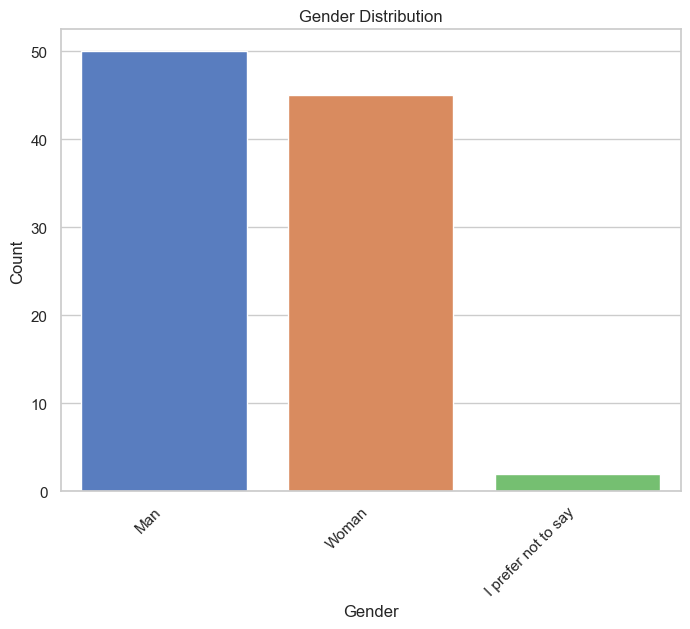

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


In [95]:
fig, ax = plt.subplots(figsize=(8, 6))

# Countplot
sns.countplot(x='gender', data=df, palette='muted')

ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

custom_labels = ['Man', 'Woman', 'I prefer not to say']
custom_positions = [0, 1, 2]

ax.set_xticks(custom_positions)
ax.set_xticklabels(custom_labels, rotation=45, ha='right')

plt.show()

C:\Users\cles\AppData\Local\Temp\ipykernel_21824\2421439736.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set rotation to 45 degrees


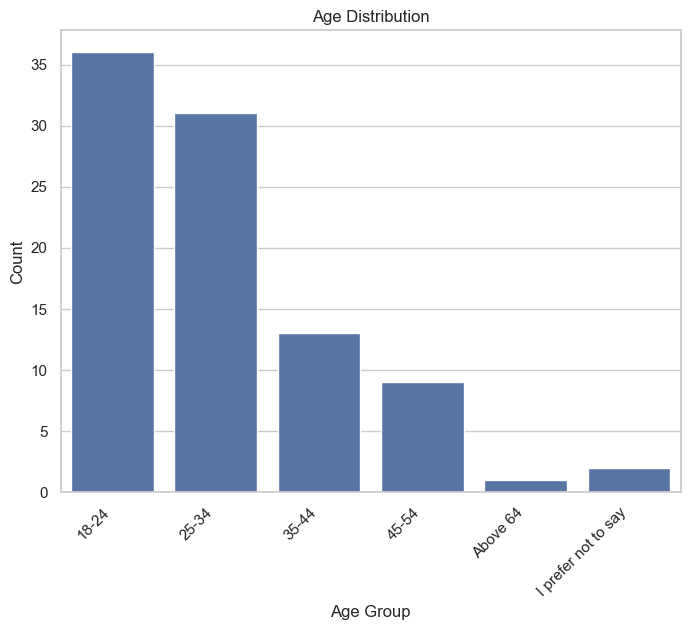

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))

# Countplot
age_order = ['18-24', '25-34', '35-44', '45-54', 'Above 64', 'I prefer not to say']
sns.countplot(x='age_group', data=df, order=age_order)

ax.set_title('Age Distribution')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set rotation to 45 degrees

plt.show()

C:\Users\cles\AppData\Local\Temp\ipykernel_21824\2317230944.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


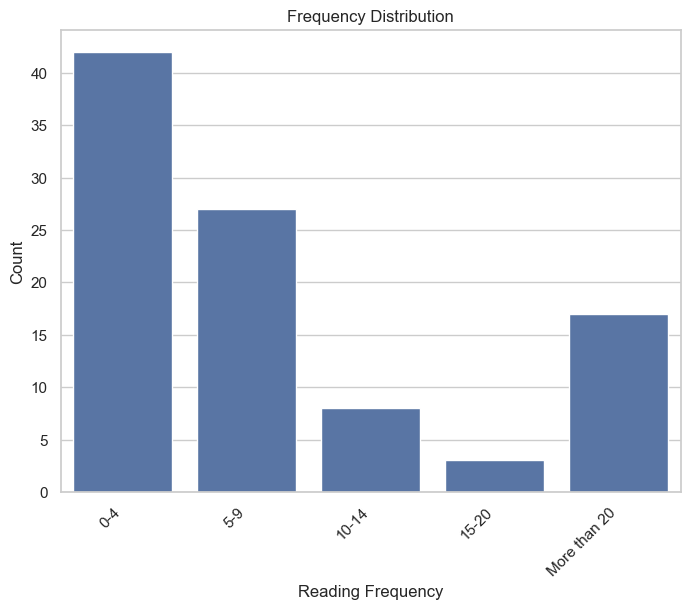

In [121]:
fig, ax = plt.subplots(figsize=(8, 6))

# Countplot
frequency_order = ['0-4', '5-9', '10-14', '15-20', 'More than 20']
sns.countplot(x='book_frequency', data=df, order=frequency_order)

ax.set_title('Frequency Distribution')
ax.set_xlabel('Reading Frequency')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

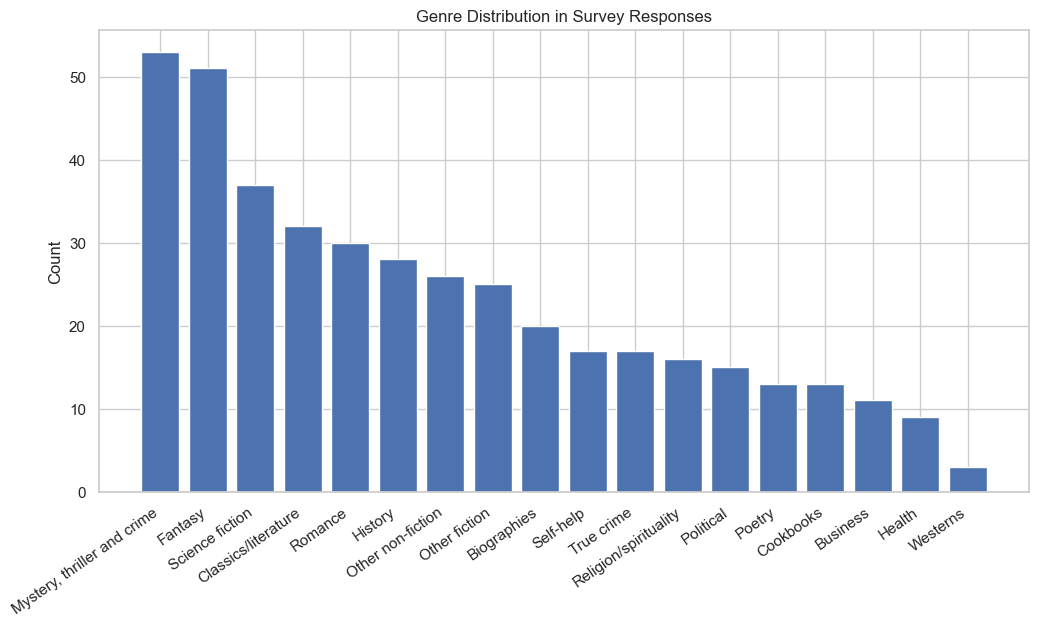

In [117]:
genre_counts = {}

for index, row in df.iterrows():
    # Access the 'genre column' value for the current row
    genres = eval(row['genre'])

    # Count genres
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Sorting genres by frequency in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Extracting sorted genres and counts
genres = [genre[0] for genre in sorted_genres]
counts = [genre[1] for genre in sorted_genres]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(genres, counts)
plt.ylabel('Count')
plt.title('Genre Distribution in Survey Responses')
plt.xticks(rotation=35, ha='right')

plt.show()

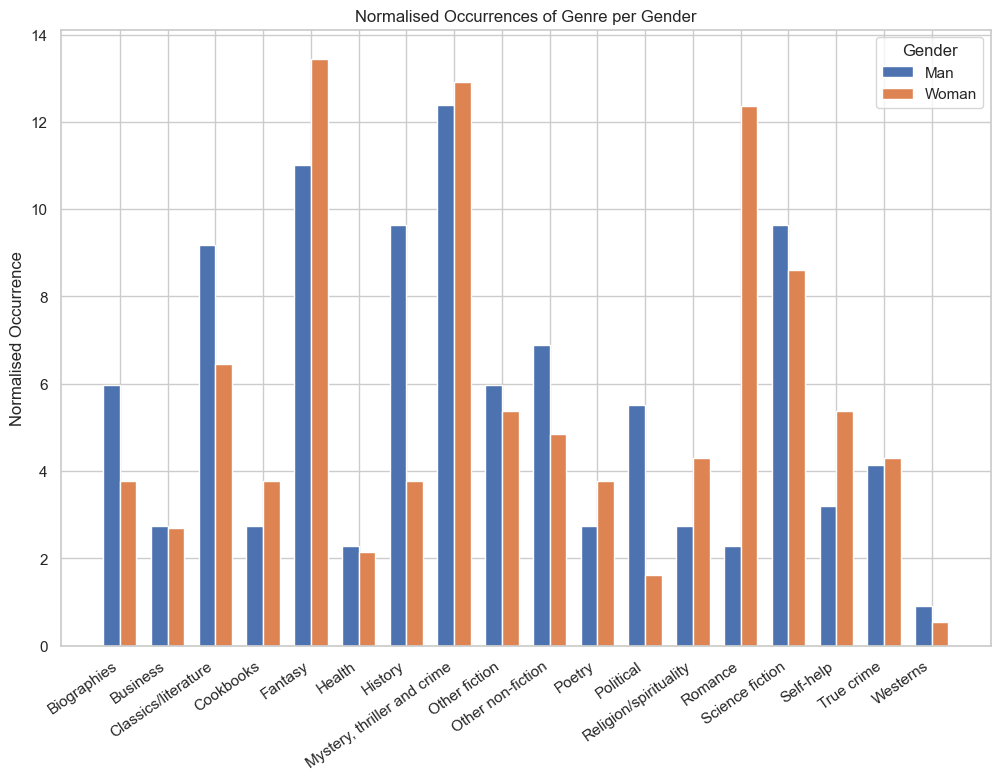

In [118]:
genre_counts = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Access the 'gender column' and 'genre column' values for the current row
    gender = ast.literal_eval(row['gender'])[0]
    genres = eval(row['genre'])

    # Count genres for the given gender
    for genre in genres:
        key = (gender, genre)
        if key in genre_counts:
            genre_counts[key] += 1
        else:
            genre_counts[key] = 1

# Filter out entries with gender 'I prefer not to say'
genre_counts = {key: value for key, value in genre_counts.items() if key[0] != 'I prefer not to say'}

# Calculate total counts for each gender
total_counts = {}
for (gender, _), count in genre_counts.items():
    if gender in total_counts:
        total_counts[gender] += count
    else:
        total_counts[gender] = count

# Calculate the percentage share for each genre
percentage_share = {key: value / total_counts[key[0]] * 100 for key, value in genre_counts.items()}

# Extract unique genders and genres
genders = list(set(gender for gender, _ in genre_counts.keys()))
genres = list(set(genre for _, genre in genre_counts.keys()))

# Sort genres alphabetically for better visualization
genres.sort()

# Creating a grouped bar chart with percentage share
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(genres))

for i, gender in enumerate(genders):
    counts = [percentage_share.get((gender, genre), 0) for genre in genres]
    plt.bar(index + i * bar_width, counts, bar_width, label=gender)

plt.ylabel('Normalised Occurrence')
plt.title('Normalised Occurrences of Genre per Gender')
plt.xticks(index + bar_width / 2, genres, rotation=35, ha='right')
plt.legend(title='Gender')

plt.show()

C:\Users\cles\AppData\Local\Temp\ipykernel_21824\3021644177.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set rotation to 45 degrees


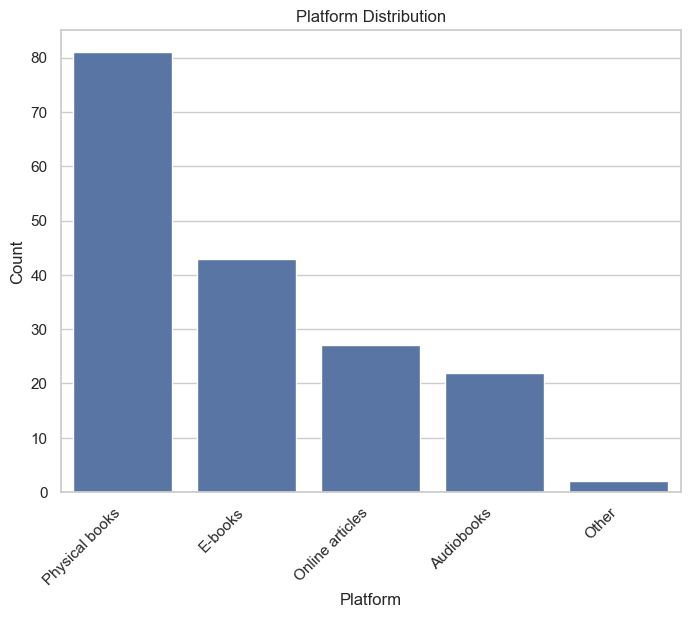

In [101]:
platform_count = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Access the 'reading_platform' value for the current row
    platforms = eval(row['reading_platform'])
    
    # Count platforms
    for platform in platforms:
        if platform in platform_count:
            platform_count[platform] += 1
        else:
            platform_count[platform] = 1

# Sorting platforms by frequency in descending order
sorted_platform = sorted(platform_count.items(), key=lambda x: x[1], reverse=True)

# Extracting sorted platforms and counts
platform = [platform[0] for platform in sorted_platform]
counts = [platform[1] for platform in sorted_platform]

# Using Seaborn for plotting
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=platform, y=counts)

ax.set(xlabel='Platform', ylabel='Count')
ax.set_title('Platform Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set rotation to 45 degrees

plt.show()